In [149]:
import pandas as pd
import numpy as np
import datetime as d_t
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [150]:
import warnings

warnings.filterwarnings("ignore")


**Data Importing & Cleaning**


In [151]:
cust= pd.read_csv('/Users/lammari_a/Documents/projet3/Project - e-commerce-analytics/CUSTOMERS.csv')
cust


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [152]:
#checking missing values
cust.isnull().sum()


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [153]:
seller=pd.read_csv('/Users/lammari_a/Documents/projet3/Project - e-commerce-analytics/SELLERS.csv')
seller


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


In [154]:
#checking missing values
seller.isnull().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [155]:
seller.nunique()


seller_id                 3095
seller_zip_code_prefix    2225
seller_city                534
seller_state                19
dtype: int64

In [156]:
prod = pd.read_csv('/Users/lammari_a/Documents/projet3/Project - e-commerce-analytics/PRODUCTS.csv')
prod

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [157]:
prod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [158]:
#checking missing values
prod.isnull().sum()


product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

- core df meant to provide the basic info is itself having null values
- it makes no sense to keep it with null values

In [159]:
orders = pd.read_csv('/Users/lammari_a/Documents/projet3/Project - e-commerce-analytics/ORDERS.csv')
orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 08:38,8/8/2018 08:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 00:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 09:54,3/9/2017 09:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [160]:
#checking missing values
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- **order_id:** A unique identifier for each order.
- **customer_id:** A unique identifier for the customer placing the order.
- **order_status:** The current status of the order (e.g., processing, shipped, delivered).
- **order_purchase_timestamp:** The timestamp indicating when the order was initially placed.
- **order_approved_at:** The timestamp indicating when the order was approved.
- **order_delivered_carrier_date:** The timestamp indicating when the order was handed over to the carrier for delivery.
- **order_delivered_customer_date:** The timestamp indicating when the order was delivered to the customer.
- **order_estimated_delivery_date:** The estimated delivery date for the order.


In [161]:
orders.groupby('order_status')['order_id'].count()


order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

the above null values are related to order status



nulls in the orders df are part of the data

In [162]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [163]:
# change the object Dtype to Datetime
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp,format='%m/%d/%Y %H:%M')
orders.order_approved_at = pd.to_datetime(orders.order_approved_at,format='%m/%d/%Y %H:%M')
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date,format='%m/%d/%Y %H:%M')
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date,format='%m/%d/%Y %H:%M')
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date,format='%m/%d/%Y %H:%M')

In [164]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [165]:
ord_items = pd.read_csv('/Users/lammari_a/Documents/projet3/Project - e-commerce-analytics/ORDER_ITEMS.csv')
ord_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [166]:
ord_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [167]:
# change the object Dtype to Datetime
ord_items.shipping_limit_date = pd.to_datetime(ord_items.shipping_limit_date,format='%m/%d/%Y %H:%M')

In [168]:
ord_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [169]:
ord_pmt = pd.read_csv('/Users/lammari_a/Documents/projet3/Project - e-commerce-analytics/ORDER_PAYMENTS.csv')
ord_pmt

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [170]:
#checking missing values
ord_pmt.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [171]:
ord_ratings = pd.read_csv('/Users/lammari_a/Documents/projet3/Project - e-commerce-analytics/ORDER_REVIEW_RATINGS.csv')
ord_ratings

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 00:00,3/11/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 00:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 00:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 00:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [172]:
#checking missing values
ord_ratings.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [173]:
ord_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [174]:
# change the object Dtype to Datetime
ord_ratings.review_creation_date = pd.to_datetime(ord_ratings.review_creation_date,format='%m/%d/%Y %H:%M')
ord_ratings.review_answer_timestamp=pd.to_datetime(ord_ratings.review_answer_timestamp,format='%m/%d/%Y %H:%M')

In [175]:
ord_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_creation_date     100000 non-null  datetime64[ns]
 4   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [176]:
geo=pd.read_csv('/Users/lammari_a/Documents/projet3/Project - e-commerce-analytics/GEO_LOCATION.csv')
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [177]:
#checking missing values
geo.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

- we have NaN in seller df (seller city & seller state) values but we have zip code of the city.
- geo df has 19015 city's details
- by merging these 2 df, we can get the data for NaN of sellers
- remove the unnecessary columns and keep the remaining

In [178]:
updated_seller = pd.merge(left=geo, right=seller,
          left_on='geolocation_zip_code_prefix', right_on='seller_zip_code_prefix',
         how='right')

In [179]:
updated_seller.drop(columns=['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng','seller_city','seller_state'],
                   inplace=True)


In [180]:
updated_seller[updated_seller.geolocation_city.isnull()]


,geolocation_city,geolocation_state,seller_id,seller_zip_code_prefix
473,NaN,NaN,5962468f885ea01a1b6a97a218797b0a,82040
791,NaN,NaN,2aafae69bf4c41fbd94053d9413e87ee,91901
1672,NaN,NaN,2a50b7ee5aebecc6fd0ff9784a4747d6,72580
1931,NaN,NaN,2e90cb1677d35cfe24eef47d441b7c87,2285
2182,NaN,NaN,0b3f27369a4d8df98f7eb91077e438ac,7412
2986,NaN,NaN,42bde9fef835393bb8a8849cb6b7f245,71551
3028,NaN,NaN,870d0118f7a9d85960f29ad89d5d989a,37708


- out of 57 null values in seller df; we filled 50
- there are still 7 Nulls remaining
    - meaning we don't have these values in the core df "geo"

In [181]:
updated_seller


,geolocation_city,geolocation_state,seller_id,seller_zip_code_prefix
0,Alwal,Andhra Pradesh,3442f8959a84dea7ee197c632cb2df15,13023
1,Alwal,Andhra Pradesh,d1b65fc7debc3361ea86b5f14c68d2e2,13023
2,Badepalle,Andhra Pradesh,ce3ad9de960102d0677a81f5d0bb7b2d,20031
3,Akkarampalle,Andhra Pradesh,c0f3eea2e14555b6faeea3dd58c1b1c3,4195
4,Akkarampalle,Andhra Pradesh,51a04a8a6bdcb23deccc82b0b80742cf,12914
...,...,...,...,...
3090,Kalan Wali,Haryana,98dddbc4601dd4443ca174359b237166,87111
3091,Akkarampalle,Andhra Pradesh,f8201cab383e484733266d1906e2fdfa,88137
3092,Akkarampalle,Andhra Pradesh,74871d19219c7d518d0090283e03c137,4650
3093,Ekambara kuppam,Andhra Pradesh,e603cf3fec55f8697c9059638d6c8eb5,96080


___________

___________

- customers df don't have nulls
- so we can rely on it

In [182]:
cust.shape


(99441, 5)

In [183]:
merged_df =cust.merge(geo,
          left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',
          how='inner')
#merged_df (99163 rows × 10 columns)

In [184]:
merged_df.drop(columns=['geolocation_zip_code_prefix','geolocation_city','geolocation_state'],inplace=True)

In [185]:
merged_df = merged_df.merge(orders, on='customer_id', how='inner')
#merged_df (99163 rows × 14 columns)

In [186]:
merged_df=merged_df.merge(ord_items, how='inner', on='order_id')
#merged_df 
#(112348 rows × 20 columns)

In [187]:
merged_df = merged_df.merge(ord_pmt, how='inner',on='order_id')
#merged_df
# 117289 rows × 24 columns


In [188]:
merged_df=merged_df.merge(ord_ratings, how='inner',on='order_id')
#merged_df
#117998 rows × 28 columns


In [189]:
merged_df=merged_df.merge(prod,how='inner',on='product_id')
#merged_df
#117998 rows × 36 columns


In [190]:
merged_df=merged_df.merge(updated_seller, how='inner',on='seller_id')
#merged_df
#117998 rows × 39 columns


In [191]:
merged_df.isna().sum()


customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
geolocation_lat                     0
geolocation_lng                     0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1247
order_delivered_customer_date    2574
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_creat

In [192]:
merged_df.shape


(117998, 39)

Droping the null values

merged_df.dropna(inplace=True)

Droping the duplicates


In [193]:
merged_df.drop_duplicates(inplace=True)


_______

In [194]:
merged_df.shape

(117998, 39)

In [195]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117998 entries, 0 to 117997
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117998 non-null  object        
 1   customer_unique_id             117998 non-null  object        
 2   customer_zip_code_prefix       117998 non-null  int64         
 3   customer_city                  117998 non-null  object        
 4   customer_state                 117998 non-null  object        
 5   geolocation_lat                117998 non-null  float64       
 6   geolocation_lng                117998 non-null  float64       
 7   order_id                       117998 non-null  object        
 8   order_status                   117998 non-null  object        
 9   order_purchase_timestamp       117998 non-null  datetime64[ns]
 10  order_approved_at              117983 non-null  datetime64[ns]
 11  

# **Q1. Perform Detailed exploratory analysis**


In [196]:
merged_df.head(4)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_city,geolocation_state,seller_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,Vijayawada,Andhra Pradesh,8577
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,Pandariya,Chhattisgarh,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:00,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,Vijayawada,Andhra Pradesh,8577
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,Pandariya,Chhattisgarh,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:00,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,Vijayawada,Andhra Pradesh,8577
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,Madanapalle,Andhra Pradesh,-23.495901,-46.874687,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:00,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,Vijayawada,Andhra Pradesh,8577


**1.а) Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc..)**

In [197]:
# Total Revenue
merged_df.payment_value.sum() 

20360353.63

In [198]:
# Total Quantity
merged_df.order_item_id.sum()

141201

In [199]:
# Total Products
merged_df.product_id.nunique()

32904

In [200]:
# Total Categories
merged_df.product_category_name.nunique()

71

In [201]:
# Total sellers
merged_df.seller_id.nunique()

3095

In [202]:
unique_locations = merged_df[['geolocation_lat', 'geolocation_lng']].drop_duplicates()

#total number of unique locations
len(unique_locations)


14817

In [203]:
unique_locations = merged_df[['geolocation_lat', 'geolocation_lng']].drop_duplicates()

#total number of unique locations
len(unique_locations)


14817

In [204]:
# Total Payment Methods
merged_df.payment_type.nunique()

4

In [205]:
# average revenue per order 
merged_df['payment_value'].sum() / merged_df['order_id'].nunique()


206.93308971349003

In [206]:
#Average Quantity per Order:
merged_df['product_id'].count() / merged_df['order_id'].nunique()


1.1992763565773292

**1.b) Understanding how many new customers acquired every month**

method 1:



In [207]:
totaldata=merged_df.copy()
totaldata.shape


(117998, 39)

In [208]:
totaldata['customer_unique_id'].nunique()


95155

method: extracting duplicated



In [209]:
fulldf=merged_df.copy()


In [210]:
fulldf['Y-m'] = fulldf.order_purchase_timestamp.dt.strftime("%Y-%m")


In [211]:
nodups = fulldf[~fulldf.customer_unique_id.duplicated()]
#selecting rows where the 'customer_unique_id' is not duplicated -- to have only rows with unique customer IDs


In [212]:
nodups.groupby(['Y-m']).customer_unique_id.count().rename('new').reset_index()


,Y-m,new
0,2016-09,2
1,2016-10,299
2,2017-01,736
3,2017-02,1678
4,2017-03,2534
5,2017-04,2296
6,2017-05,3502
7,2017-06,3069
8,2017-07,3804
9,2017-08,4111


**1.c) Understand the retention of customers on month on month basis**


In [213]:
totaldata=merged_df.copy()


In [214]:
totaldata['Year']=totaldata['order_purchase_timestamp'].dt.strftime('%Y')
totaldata['Month']=totaldata['order_purchase_timestamp'].dt.strftime('%b')


In [215]:
# geting the data with duplicated cust ids to understand the retention
time_soted = totaldata[totaldata.customer_unique_id.duplicated()].sort_values(by='order_purchase_timestamp')


In [216]:
monthly_old_cust=time_soted.groupby(['Year','Month'],sort=False).customer_unique_id.count().reset_index()

In [217]:
monthly_old_cust


,Year,Month,customer_unique_id
0,2016,Sep,1
1,2016,Oct,87
2,2016,Dec,1
3,2017,Jan,287
4,2017,Feb,394
5,2017,Mar,659
6,2017,Apr,562
7,2017,May,931
8,2017,Jun,735
9,2017,Jul,1073


In [218]:
monthly_old_cust['Date'] = monthly_old_cust['Year'].astype(str) + '-' + monthly_old_cust['Month']


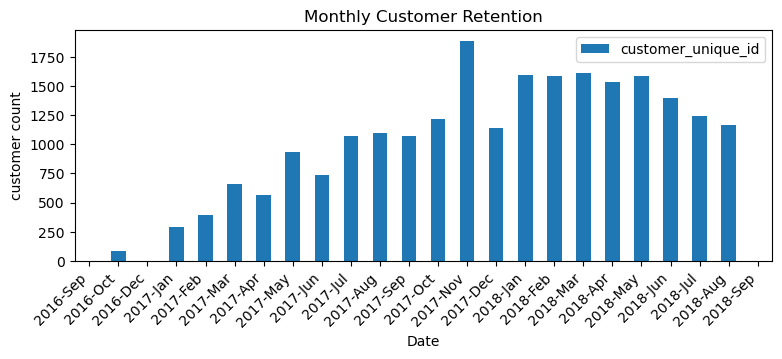

In [219]:
monthly_old_cust.plot.bar(x = 'Date',y = 'customer_unique_id',title = "Monthly Customer Retention")
plt.ylabel('customer count')
plt.xticks(rotation=45, ha='right')
plt.gcf().set_size_inches(9,3)
plt.show()


method 2: extracting duplicated



In [220]:
dups = fulldf[fulldf.customer_unique_id.duplicated()]
#duplicated customers


In [221]:
dups.groupby(['Y-m']).customer_unique_id.count().rename('old/existing').reset_index()

,Y-m,old/existing
0,2016-09,1
1,2016-10,87
2,2016-12,1
3,2017-01,287
4,2017-02,394
5,2017-03,659
6,2017-04,562
7,2017-05,931
8,2017-06,735
9,2017-07,1073


**1.d) How the revenues from existing/new customers on month on month basis**

In [222]:
existing_revenue = time_soted.groupby(['Year','Month'],
                                    sort=False).agg(existing_cust_revenue=('payment_value','sum'))

In [223]:
existing = dups.groupby(['Y-m']).payment_value.sum().rename('old/existing').reset_index()

In [224]:
new = nodups.groupby(['Y-m']).payment_value.sum().rename('new').reset_index()

In [225]:
rev = pd.merge(right=existing, left=new,
        on='Y-m',
        how='outer', sort=True).set_index('Y-m')
rev

,new,old/existing
Y-m,,
2016-09,211.29,136.23
2016-10,55366.38,19407.16
2016-12,NaN,19.62
2017-01,128846.32,60723.70
2017-02,275153.12,71061.19
2017-03,410129.59,118959.89
2017-04,384537.08,121756.39
2017-05,548200.03,180184.96
2017-06,473224.99,127450.38


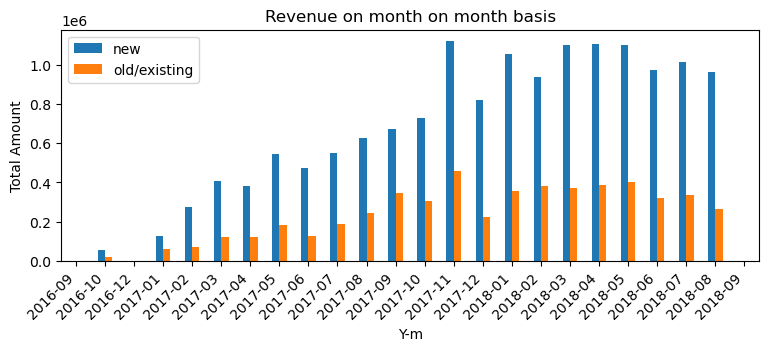

In [226]:
rev.plot(kind = 'bar', figsize=(8,6))
plt.ylabel('Total Amount')
plt.title('Revenue on month on month basis')
plt.xticks(rotation=45, ha='right')
plt.gcf().set_size_inches(9,3)
plt.show()

**1.e) Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…**

In [227]:
one_e = merged_df.copy()


In [228]:
one_e['month']=one_e.order_purchase_timestamp.dt.strftime('%m')
one_e['year'] = one_e.order_purchase_timestamp.dt.strftime('%Y')
one_e['week'] = one_e.order_purchase_timestamp.dt.strftime('%W')
one_e['day'] = one_e.order_purchase_timestamp.dt.strftime('%a')


In [229]:
one_e['Date']=one_e.order_purchase_timestamp.dt.strftime("%Y-%m")


In [230]:
monthly_sales = one_e.groupby('Date')['payment_value'].sum().reset_index()
monthly_quantity = one_e.groupby('Date')['product_id'].count().reset_index()



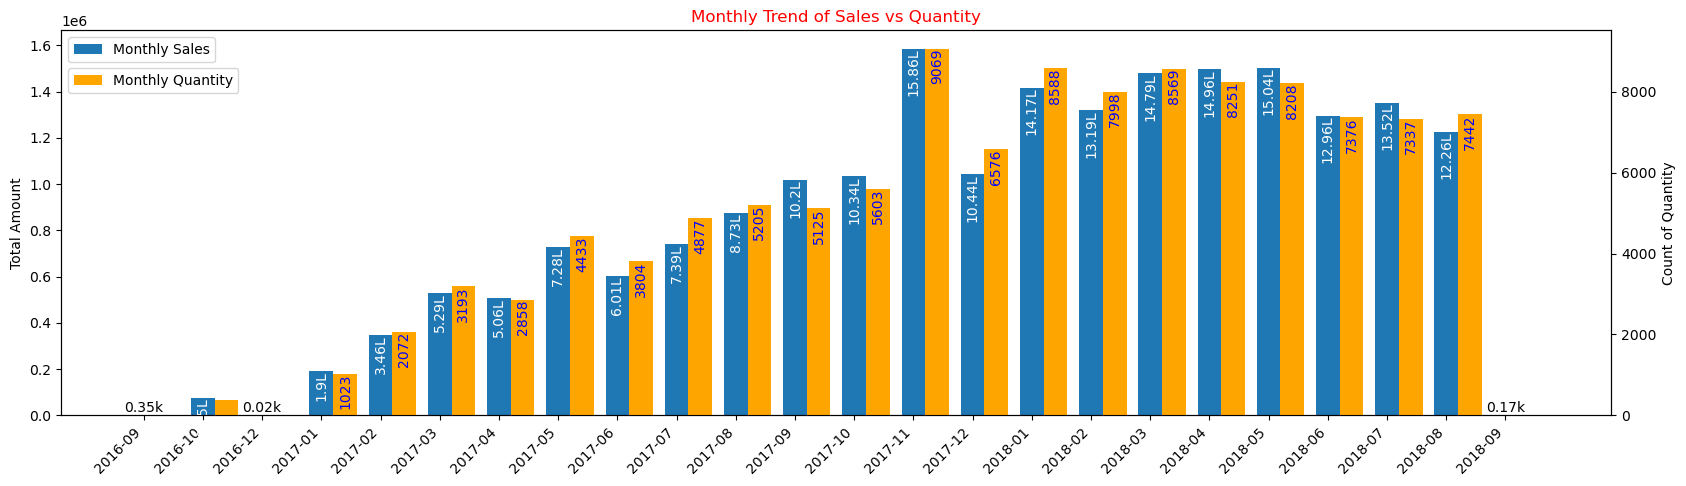

In [231]:
fig, ax1 = plt.subplots(figsize=[20, 5])
bar1 = ax1.bar(monthly_sales.Date, monthly_sales.payment_value, width=0.4,label='Monthly Sales')
ax1.set_ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
bars2 = ax2.bar(np.arange(len(monthly_quantity.Date)) + 0.4, monthly_quantity.product_id, color='orange', label='Monthly Quantity', width=0.4)
ax2.set_ylabel('Count of Quantity')
plt.title('Monthly Trend of Sales vs Quantity', c='red')

for i, j in zip(monthly_sales.index, monthly_sales.payment_value):
    if j > 10000:
        ax1.text(i, j, f'{round(j/100000, 2)}L', ha='center', va='top', rotation=90, c='w')
    else:
        ax1.text(i, j, f'{round(j/1000, 2)}k', ha='center', va='bottom')

for bar2 in bars2:
    yval = bar2.get_height()
    if yval > 500:
        ax2.text(bar2.get_x() + bar2.get_width() / 2, yval, round(yval, 2), ha='center', va='top', rotation=90, color='b')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.92))

plt.show()

In [232]:
day_sales = one_e.groupby('day')['payment_value'].sum().reset_index()
day_quantity = one_e.groupby('day')['product_id'].count().reset_index()


In [233]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Sort the DataFrames by the custom order
day_sales['day'] = pd.Categorical(day_sales['day'], categories=day_order, ordered=True)
day_sales = day_sales.sort_values(by='day')

day_quantity['day'] = pd.Categorical(day_quantity['day'], categories=day_order, ordered=True)
day_quantity = day_quantity.sort_values(by='day')


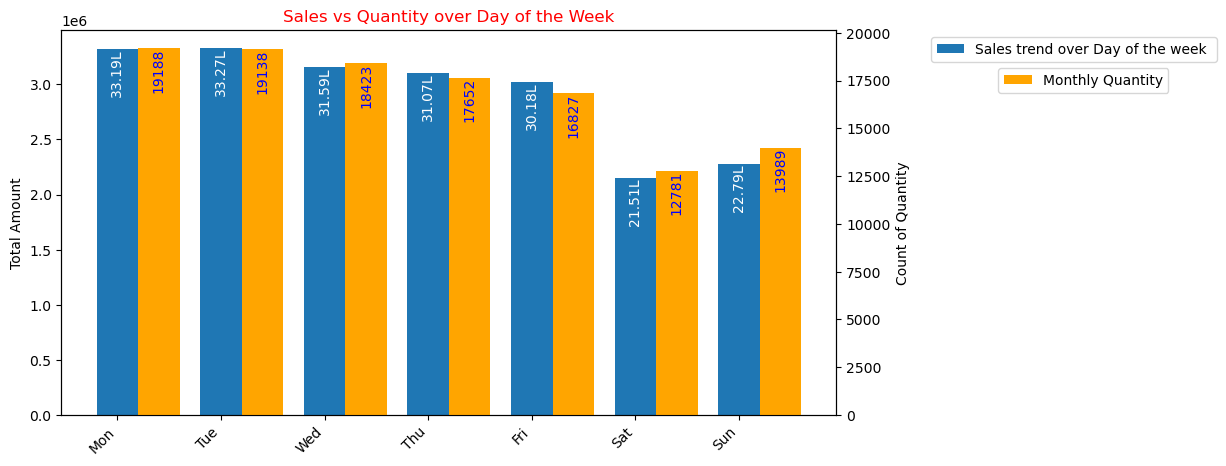

In [234]:
fig, ax1 = plt.subplots(figsize=[10, 5])

bar1 = ax1.bar(day_sales.day, day_sales.payment_value, width=0.4, label='Sales trend over Day of the week ')
ax1.set_ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')

# Add values on top of the first bar chart
for bar, value in zip(bar1, day_sales.payment_value):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{round(value/100000, 2)}L', ha='center', va='top', rotation=90, color='w')

# Create a second y-axis
ax2 = ax1.twinx()

bars2 = ax2.bar(np.arange(len(day_quantity.day)) + 0.4, day_quantity.product_id, color='orange', label='Monthly Quantity', width=0.4)
ax2.set_ylabel('Count of Quantity')
plt.title('Sales vs Quantity over Day of the Week', c='red')

# Add values on top of the second bar chart
for bar, value in zip(bars2, day_quantity.product_id):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),ha='center', va='top', rotation=90, color='b')

ax1.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.2, 0.92))

ax1.set_xticks(day_order)

plt.show()

In [235]:
# New column for time intervals
one_e['hour_interval'] = pd.cut(one_e['order_purchase_timestamp'].dt.hour,
                                bins=range(0, 25),
                                include_lowest=True,
                                right=False,
                                labels=[f'{i:02d}:00-{i:02d}:59' for i in range(0, 24)])


hourly_sales = one_e.groupby('hour_interval')['payment_value'].sum()


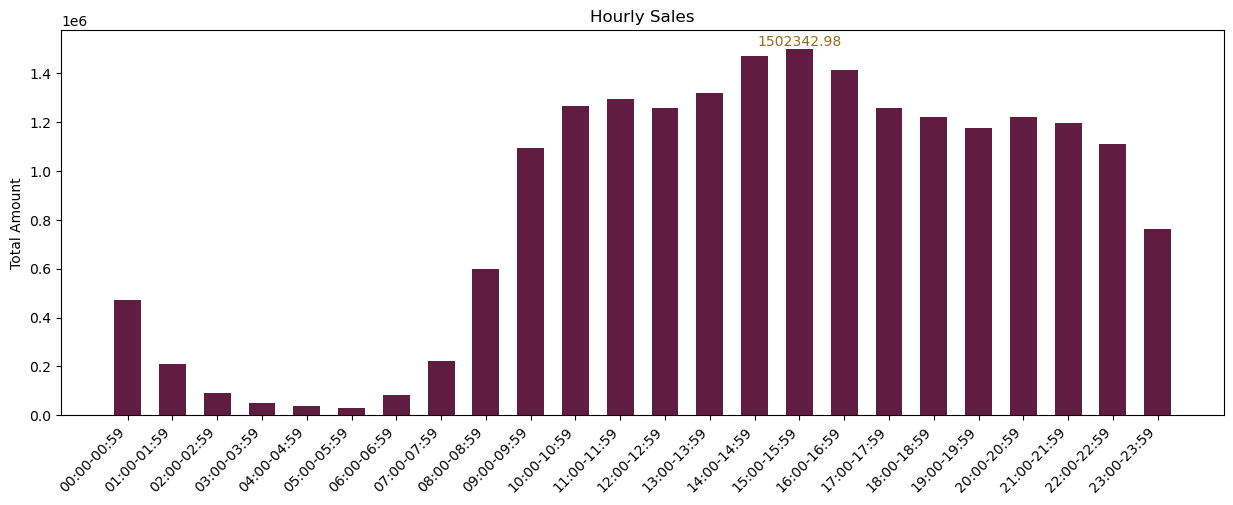

In [236]:
fig, ax = plt.subplots(figsize=[15, 5])
bar = ax.bar(hourly_sales.index, hourly_sales.values, width=0.6, color='#611c42')

ax.set_ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.title('Hourly Sales')

# Get the top 1 entry using nlargest
top_hourly_sales = hourly_sales.nlargest(1)
bar_index = top_hourly_sales.index[0]
bar_value = top_hourly_sales.values[0]
ax.text(bar_index, bar_value, f'{bar_value:.2f}', ha='center', va='bottom',color='#94691f')

plt.show()


In [237]:
category_sales = one_e.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False)
category_quantity = one_e.groupby('product_category_name')['product_id'].count().sort_values(ascending=False)

In [238]:
# Since there are 71 rows, Selecting the top 'n' categories to plot
top_n = 10
top_category_sales = category_sales.head(top_n)
top_category_quantity = category_quantity.loc[top_category_sales.index]


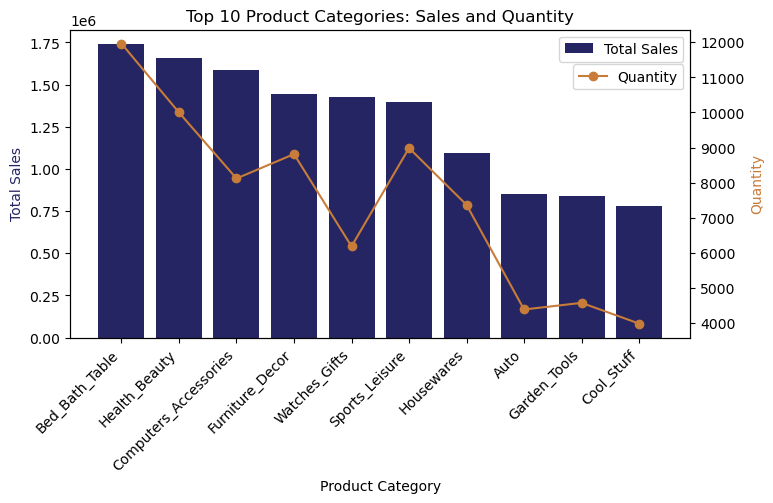

In [239]:
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.bar(top_category_sales.index, top_category_sales.values, color='#252563')
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Total Sales', color='#252563')

ax2 = ax1.twinx()
line_color = '#c77c3a'
ax2.plot(top_category_quantity.index, top_category_quantity.values, color=line_color, marker='o')
ax2.set_ylabel('Quantity', color=line_color)

#plt.xticks(rotation=45) is not working
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.legend(['Total Sales'], loc='upper right')
ax2.legend(['Quantity'], loc='upper right', bbox_to_anchor=(1, 0.91))

plt.title(f'Top {top_n} Product Categories: Sales and Quantity')
plt.show()

In [240]:
location_sales = one_e.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).reset_index()
location_quantity = one_e.groupby('customer_state')['product_id'].count().sort_values(ascending=False).reset_index()


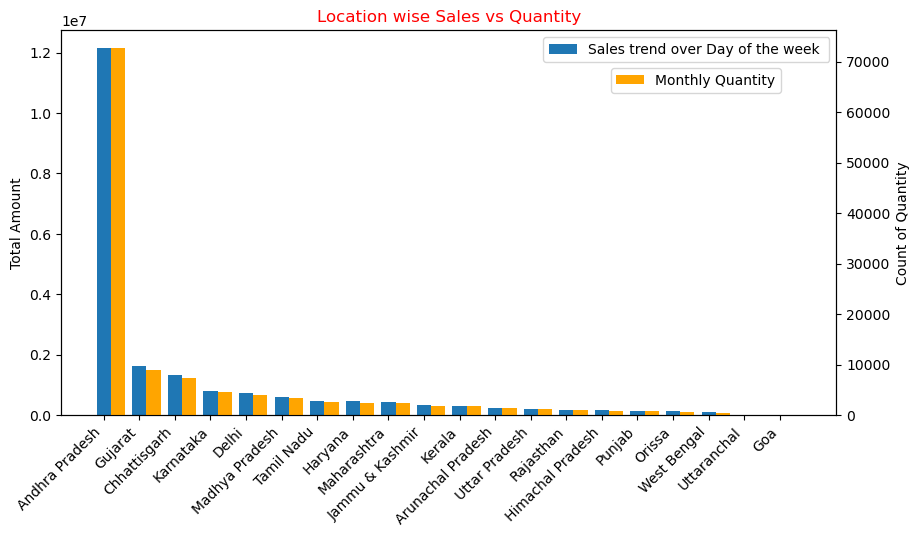

In [241]:
fig, ax1 = plt.subplots(figsize=[10, 5])

bar1 = ax1.bar(location_sales.customer_state, location_sales.payment_value, width=0.4, label='Sales trend over Day of the week ')
ax1.set_ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()

bars2 = ax2.bar(np.arange(len(location_quantity.customer_state)) + 0.4, location_quantity.product_id, color='orange', label='Monthly Quantity', width=0.4)
ax2.set_ylabel('Count of Quantity')
plt.title('Location wise Sales vs Quantity', c='red')

ax1.legend(loc='upper right')
ax2.legend(loc='upper left', bbox_to_anchor=(0.7, 0.92))

plt.show()


In [242]:
payment_method_sales = one_e.groupby('payment_type')['payment_value'].sum().reset_index()

In [243]:
payment_method_sales


,payment_type,payment_value
0,UPI,4068362.00
1,credit_card,15629400.45
2,debit_card,254447.23
3,voucher,408143.95


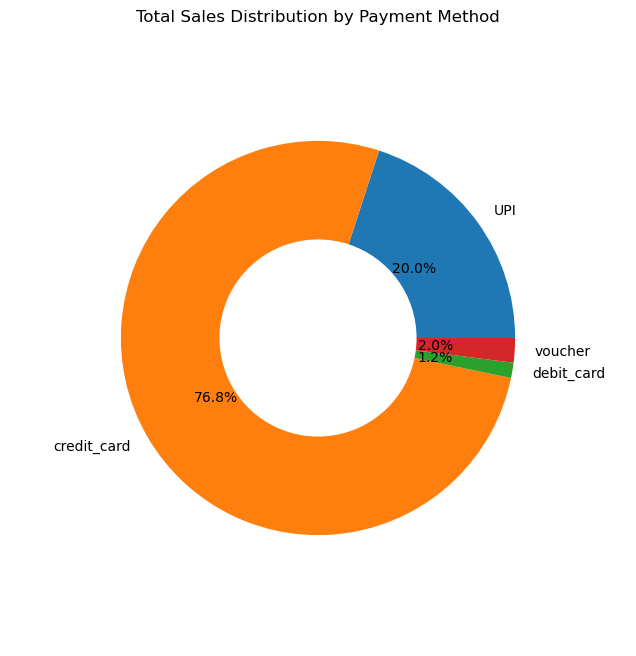

In [244]:
plt.figure(figsize=(8, 8))

plt.pie(payment_method_sales['payment_value'], labels=payment_method_sales['payment_type'], autopct='%1.1f%%', wedgeprops=dict(width=0.4), radius=0.8)

plt.title('Total Sales Distribution by Payment Method')
plt.show()


**1.f) Popular Products by month, seller, state, category.**

In [245]:
one_f = merged_df.copy()


In [246]:
one_f['Date']=one_f.order_purchase_timestamp.dt.strftime("%Y-%b")


In [247]:
one_f['Month']=one_f.order_purchase_timestamp.dt.strftime("%m")
one_f['Year']=one_f.order_purchase_timestamp.dt.strftime("%Y")

In [248]:
# Group by month and product, count occurrences, and 
# find the top 5 products for each month
top_products_by_month = (
    one_f.groupby(['Year','Month', 'product_id'])
    .size()
    .reset_index(name='count')
    .sort_values(['Year','Month', 'count'], ascending=[True,True, False])
    .groupby(['Year','Month'])
    .head(5))

top_products_by_month.head(20).set_index(['Year','Month'])

product_id  count
Year Month                                         
2016 09     c1488892604e4ba5cff5b4eb4d595400      1
     09     f293394c72c9b5fafd7023301fc21fc2      1
     09     f3c2d01a84c947b078e32bbef0718962      1
     10     eba7488e1c67729f045ab43fac426f2e     11
     10     85b99d83c60cab5b4d8f927ad35212a1      7
     10     473795a355d29305c3ea6b156833adf5      6
     10     bdcec8e22b04a8f4241d87bcfe9ea877      6
     10     d9894482fba41f536a273ba2276d951f      6
     12     f5d8f4fbc70ca2a0038b9a0010ed5cb0      1
2017 01     985c412b0ac92ed9d8a76bbeab6d44eb     16
     01     37eb69aca8718e843d897aa7b82f462d     15
     01     e5d860a0fff2e94bd1a406456cc6c4b3     13
     01     a703f5ade6e4fae527357132230ea778     12
     01     913580fde3e72c3b3e4ce0b79963bee6     11
     02     42fffc68ff7e8176f11baaf4a4227557     13
     02     a703f5ade6e4fae527357132230ea778     13
     02     473795a355d29305c3ea6b156833adf5     12
     02     154e7e31ebfa092203795c972e5804a6     11
     02     82183967d9fde935fc0b0189bb68ccec     11
     03     7e0dc102074f8285580c9777f79c90cf     45

In [249]:
# find the top 5 products for each seller
top_products_by_seller = (
    one_f.groupby(['seller_id', 'product_id'])
    .size()
    .reset_index(name='count')
    .sort_values(['seller_id', 'count'], ascending=[True, False])
    .groupby(['seller_id'])
    .head(5))

top_products_by_seller.head(20).set_index('seller_id')


,product_id,count
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,115
001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580,48
001cca7ae9ae17fb1caed9dfb1094831,98a8c2fa16d7239c606640f5555768e4,30
001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,17
001cca7ae9ae17fb1caed9dfb1094831,547b95702aec86f05ac37e61d164891c,17
001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
002100f778ceb8431b7a1020ff7ab48f,414c53fa9c5cc4a0390682aeb2e25ec1,14


In [250]:
# find the top 5 products for each State
top_products_by_seller = (
    one_f.groupby(['customer_state', 'product_id'])
    .size()
    .reset_index(name='count')
    .sort_values(['customer_state', 'count'], ascending=[True, False])
    .groupby(['customer_state'])
    .head(5))

top_products_by_seller.head(20).set_index('customer_state')

,product_id,count
customer_state,,
Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,344
Andhra Pradesh,99a4788cb24856965c36a24e339b6058,322
Andhra Pradesh,422879e10f46682990de24d770e7f83d,301
Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,226
Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08,226
Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12
Arunachal Pradesh,7c68e7297c7df2535c9f0dcd61007f64,10
Arunachal Pradesh,368c6c730842d78016ad823897a372db,9
Arunachal Pradesh,e0d64dcfaa3b6db5c54ca298ae101d05,9


In [251]:
# find the top 5 products for each Category
top_products_by_category = (
    one_f.groupby(['product_category_name', 'product_id'])
    .size()
    .reset_index(name='count')
    .sort_values(['product_category_name', 'count'], ascending=[True, False])
    .groupby(['product_category_name'])
    .head(5))

top_products_by_category.head(20).set_index('product_category_name')

,product_id,count
product_category_name,,
Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44
Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690,19
Agro_Industry_And_Commerce,672e757f331900b9deea127a2a7b79fd,17
Agro_Industry_And_Commerce,07f01b6fcacc1b187a71e5074199db2d,15
Agro_Industry_And_Commerce,a0fe1efb855f3e786f0650268cd77f44,15
Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
Air_Conditioning,ccb162ed569f47d83f62aebd5700d7ad,13
Air_Conditioning,0e34187d4312b97b5e698836d28ed040,11
Air_Conditioning,e932008cf0ea7c93a077dd8d7e5f49eb,10


**1.g) Popular categories by state, month**


In [252]:
# find the top 1 Popular categories for each state
top_products_by_category = (
    one_f.groupby(['customer_state','product_category_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['customer_state', 'count'], ascending=[True, False])
    .groupby(['customer_state'])
    .head(1))

top_products_by_category.set_index('customer_state')


,product_category_name,count
customer_state,,
Andhra Pradesh,Bed_Bath_Table,7716
Arunachal Pradesh,Bed_Bath_Table,128
Chhattisgarh,Bed_Bath_Table,733
Delhi,Health_Beauty,332
Goa,Auto,1
Gujarat,Bed_Bath_Table,806
Haryana,Bed_Bath_Table,296
Himachal Pradesh,Bed_Bath_Table,85
Jammu & Kashmir,Bed_Bath_Table,184


In [253]:
# Find the top 1 Popular categories for each state
top_products_by_category = (
    one_f.groupby(['Year', 'Month', 'product_category_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['Year', 'Month', 'count'], ascending=[True, True, False])
    .groupby(['Year', 'Month'])
    .head(1)
)

top_products_by_category.set_index(['Year', 'Month'], inplace=True)

top_products_by_category

product_category_name  count
Year Month                                                
2016 09                             Furniture_Decor      2
     10                             Furniture_Decor     80
     12                    Fashion_Bags_Accessories      1
2017 01                             Furniture_Decor    207
     02                             Furniture_Decor    283
     03                             Furniture_Decor    346
     04                              Bed_Bath_Table    312
     05                              Bed_Bath_Table    430
     06                              Bed_Bath_Table    431
     07                              Bed_Bath_Table    641
     08                              Bed_Bath_Table    590
     09                              Bed_Bath_Table    574
     10                              Bed_Bath_Table    611
     11                              Bed_Bath_Table   1035
     12                              Bed_Bath_Table    587
2018 01                              Bed_Bath_Table    918
     02                       Computers_Accessories   1020
     03                              Bed_Bath_Table    840
     04                              Bed_Bath_Table    776
     05                               Health_Beauty    801
     06                               Health_Beauty    901
     07                               Health_Beauty    805
     08                               Health_Beauty    876
     09     Kitchen_Dining_Laundry_Garden_Furniture      1

**1.h) List top 10 most expensive products sorted by price**


In [254]:
one_f.nlargest(10, 'price')[['product_id','product_category_name' ,'price']].reset_index()


,index,product_id,product_category_name,price
0,115921,489ae2aa008f021502940f251d4cce7f,Housewares,6735.00
1,117766,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,6729.00
2,116964,1bdf5e6731585cf01aa8169c7028d6ad,Art,6499.00
3,111037,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,4799.00
4,111044,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,4690.00
5,93890,259037a6a41845e455183f89c5035f18,Computers,4590.00
6,111645,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,4399.87
7,69498,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,4099.99
8,79664,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,4059.00
9,10863,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,3999.90


# **2. Performing Customers/sellers Segmentation**

**2a. Divide the customers into groups based on the revenue generated**

In [255]:
two_df = merged_df.copy()


In [256]:
customer_revenue =two_df.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='total_revenue')
customer_revenue.head(4)

,customer_unique_id,total_revenue
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62


In [257]:
# Create a new column 'cust_segmt' based on percentiles
percentiles = [0, 0.2, 0.50, 0.66, 0.9, 1]
labels = ['Occasional Buyers', 'Regular Buyers', 'Valued Customers', 'Loyal Customers','Top Spenders']

customer_revenue['cust_segmt'] = pd.qcut(customer_revenue['total_revenue'], q=percentiles, labels=labels)
customer_revenue.head(4)

,customer_unique_id,total_revenue,cust_segmt
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,Valued Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,Occasional Buyers
2,0000f46a3911fa3c0805444483337064,86.22,Regular Buyers
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,Occasional Buyers


In [258]:
customer_revenue.groupby('cust_segmt')['total_revenue']\
.agg([('min'), ('max'), ('count'), 
        ('pct_of_customers', 
         lambda x: (x.count() / customer_revenue['customer_unique_id'].nunique()) * 100)])

,min,max,count,pct_of_customers
cust_segmt,,,,
Occasional Buyers,9.59,56.07,19031,20.000000
Regular Buyers,56.08,113.34,28551,30.004729
Valued Customers,113.35,161.77,15223,15.998108
Loyal Customers,161.79,406.51,22835,23.997688
Top Spenders,406.53,109312.64,9515,9.999475


**b. Divide the sellers into groups based on the revenue generated**

In [259]:
seller_revenue = two_df.groupby('seller_id')['payment_value'].sum().reset_index(name='total_revenue')


In [260]:
percentiles = [0, 0.2, 0.50, 0.66, 0.9, 1]
labels = ['Emerging Sellers', 'Growing Sellers', 'Established Sellers', 'Top Sellers','Market Leaders']

seller_revenue['seller_segmt'] = pd.qcut(seller_revenue['total_revenue'], q=percentiles, labels=labels)

In [261]:
seller_revenue.groupby('seller_segmt')['total_revenue']\
.agg([('min'), ('max'), ('count'), 
        ('pct_of_sellerss', 
         lambda x: (x.count() / seller_revenue['seller_id'].nunique()) * 100)])


,min,max,count,pct_of_sellerss
seller_segmt,,,,
Emerging Sellers,12.22,231.96,619,20.000000
Growing Sellers,232.47,1245.10,929,30.016155
Established Sellers,1246.66,2836.90,495,15.993538
Top Sellers,2845.12,14559.57,742,23.974152
Market Leaders,14651.76,512147.49,310,10.016155


**3. Cross-Selling (Which products are selling together)**

Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [262]:
keep_dup_ord = two_df[two_df.order_id.duplicated(keep=False)]
# keep only rows with duplicated order ids to have orders with multiple products.

In [263]:
remo_dup_ord_prod = keep_dup_ord.drop_duplicates(subset=['order_id','product_id'])
# remove duplicates by order_id & product_id

idea is to get: order_id product_id cross_sell 1 1 B B,A 2 1 A B,A 3 2 C C 4 3 D D


In [264]:
remo_dup_ord_prod['cross_prods'] = remo_dup_ord_prod.groupby('order_id')['product_id'].transform(lambda x: ','.join(x))


In [265]:
(
    remo_dup_ord_prod.groupby('cross_prods')['order_id']
    .count().reset_index(name='No. of orders')
)

,cross_prods,No. of orders
0,001795ec6f1b187d37335e1c4704762e,2
1,001b72dfd63e9833e8c02742adf472e3,2
2,"001b72dfd63e9833e8c02742adf472e3,e19ddcc85537b...",2
3,00210e41887c2a8ef9f791ebc780cc36,3
4,0021a87d4997a48b6cef1665602be0f5,1
...,...,...
9058,ffc9caf33e2d1e9f44e3e06da19085f7,1
9059,ffd4bf4306745865e5692f69bd237893,1
9060,"ffe8083298f95571b4a66bfbc1c05524,72b781d37ad5c...",2
9061,ffef256879dbadcab7e77950f4f4a195,1


In [266]:
cross_sell_counts = (
    remo_dup_ord_prod.groupby('cross_prods')['order_id']
    .count()
    .reset_index(name='No. of orders')
    .sort_values(by='No. of orders', ascending=False)
    .set_index('cross_prods'))

cross_sell_counts


,No. of orders
cross_prods,
aca2eb7d00ea1a7b8ebd4e68314663af,86
422879e10f46682990de24d770e7f83d,80
53759a2ecddad2bb87a079a1f1519f73,70
"36f60d45225e60c7da4558b070ce4b60,e53e557d5a159f5aa2c5e995dfdf244b",64
368c6c730842d78016ad823897a372db,62
...,...
38f6f11c49e90b02571dea02043c9e3a,1
38faaf77a4cd4dfb50ea8512e66285b0,1
9805b37a2e4983fb5dbb5c8168590c44,1


In [267]:
# Exclude entries with only one product ID
cross_sell_counts = (
    cross_sell_counts.reset_index()
    .query('`cross_prods`.str.count(",") > 0'))
cross_sell_counts

,cross_prods,No. of orders
3,"36f60d45225e60c7da4558b070ce4b60,e53e557d5a159...",64
7,"99a4788cb24856965c36a24e339b6058,35afc973633aa...",52
9,"f4f67ccaece962d013a4e1d7dc3a61f7,4fcb3d9a5f487...",34
21,"36f60d45225e60c7da4558b070ce4b60,3f14d740544f3...",20
23,"389d119b48cf3043d311335e499d9c6b,422879e10f466...",18
...,...,...
4306,"21ee06f7fd37a6fe4841865339411674,61509eaebb2d4...",2
4309,"4e4533c3f5832b58737e5a6229fe39f5,1bab2e484686f...",2
4310,"4d3060c26750a6fcd7af9355fdbff8dd,8a33c55582d40...",2
4311,"216ac797639b7734f0b125861ea845ae,3731a08877914...",2


In [268]:
cross_sell_counts.sort_values(by='No. of orders', ascending=False).head(10).set_index('cross_prods')


,No. of orders
cross_prods,
"36f60d45225e60c7da4558b070ce4b60,e53e557d5a159f5aa2c5e995dfdf244b",64
"99a4788cb24856965c36a24e339b6058,35afc973633aaeb6b877ff57b2793310",52
"f4f67ccaece962d013a4e1d7dc3a61f7,4fcb3d9a5f4871e8362dfedbdb02b064",34
"36f60d45225e60c7da4558b070ce4b60,3f14d740544f37ece8a9e7bc8349797e",20
"389d119b48cf3043d311335e499d9c6b,422879e10f46682990de24d770e7f83d",18
"0d85c435fd60b277ffb9e9b0f88f927a,ee57070aa3b24a06fdd0e02efd2d757d",12
"5fc3e6a4b52b0c414458104ed4037f1c,5d790355cbeded0cd60e25cbc4c527a2",12
"98d61056e0568ba048e5d78038790e77,060cb19345d90064d1015407193c233d",12
"ad4b5def91ac7c575dbdf65b5be311f4,e6b314a2236c162ede1a879f1075430f",12


# **4. Payment Behaviour**

**4a. How customers are paying?**


In [269]:
four_df = merged_df.copy()


In [270]:
four_df['Month_num']=four_df['order_purchase_timestamp'].dt.strftime('%m')
four_df['Month']=four_df['order_purchase_timestamp'].dt.strftime('%b')
four_df['Hour'] = four_df['order_purchase_timestamp'].dt.strftime('%H')


In [271]:
four_df.groupby('payment_type')['payment_value'].sum()


payment_type
UPI             4068362.00
credit_card    15629400.45
debit_card       254447.23
voucher          408143.95
Name: payment_value, dtype: float64

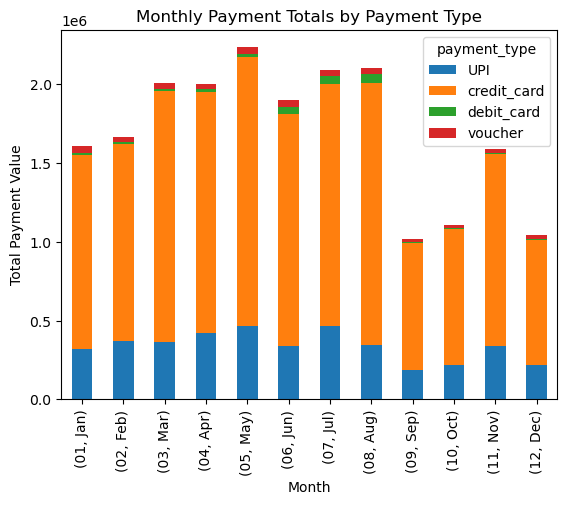

In [272]:
monthly_payment_totals = four_df.groupby(["Month_num",'Month', 'payment_type'])['payment_value'].sum()
 
monthly_payment_totals.unstack().plot(kind='bar', stacked=True, 
                                      xlabel='Month', ylabel='Total Payment Value', 
                                      title='Monthly Payment Totals by Payment Type')

plt.show()


**4b. Which payment channels are used by most customers?**

In [273]:
payment_channels_counts = four_df['payment_type'].value_counts().reset_index(name='count')
payment_channels_counts

,index,count
0,credit_card,87026
1,UPI,22957
2,voucher,6317
3,debit_card,1698


In [274]:
plt.figure(figsize=(6, 6))

plt.pie(payment_channels_counts['count'], labels=payment_channels_counts['payment_type'], autopct='%1.1f%%', wedgeprops=dict(width=0.4), radius=0.8)

plt.title('Distribution of Payment Channels')
plt.show()


KeyError: 'payment_type'

<Figure size 600x600 with 0 Axes>

# **5. Customer satisfaction towards category & product**

**a. Which categories (top 10) are maximum rated & minimum rated**

In [275]:
category_avg_scores=four_df.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)


In [276]:
top_10_max_rated_categories = category_avg_scores.head(10)
progress_data = pd.DataFrame({'Category': top_10_max_rated_categories.index, 
                              'Average Review Score': top_10_max_rated_categories.values, 
                              'Total Score': [5]*10})
progress_data.set_index('Category', inplace=True)
progress_data.sort_values(by='Average Review Score',ascending=True,inplace=True)


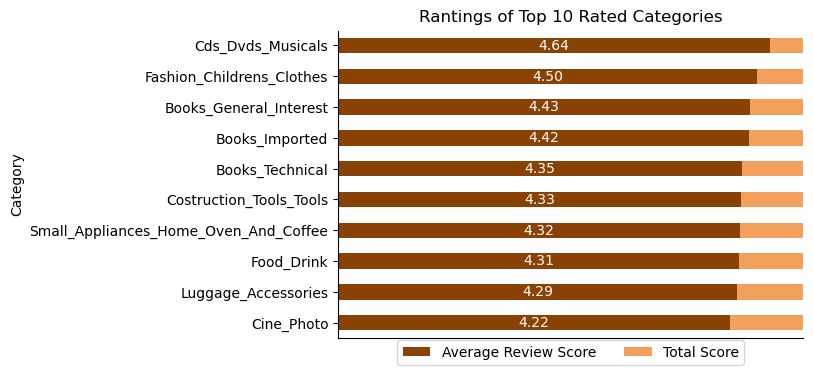

In [277]:
fig, ax = plt.subplots(figsize=(6, 4))

progress_data.plot(kind='barh', stacked=True, ax=ax, color=['#8a4104', '#f2a05c'])
ax.set_xlim(0, progress_data['Total Score'].max())

# Remove x-axis labels
ax.set_xticks([])

# Display values on the bars
for bar, value in zip(ax.patches, progress_data['Average Review Score']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', 
            ha='center', va='center', color='white', fontsize=10)

# Remove or change the color of the right and top spines (border)
ax.spines['right'].set_color('white')  
ax.spines['top'].set_color('white') 

ax.set_title('Rantings of Top 10 Rated Categories')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.11),ncol=2)

plt.show()


In [278]:
top_10_min_rated_categories = category_avg_scores.tail(10)
progress_data2 = pd.DataFrame({'Category': top_10_min_rated_categories.index, 
                               'Average Review Score': top_10_min_rated_categories.values, 
                               'Total Score': [5]*10})
progress_data2.set_index('Category', inplace=True)
#progress_data2

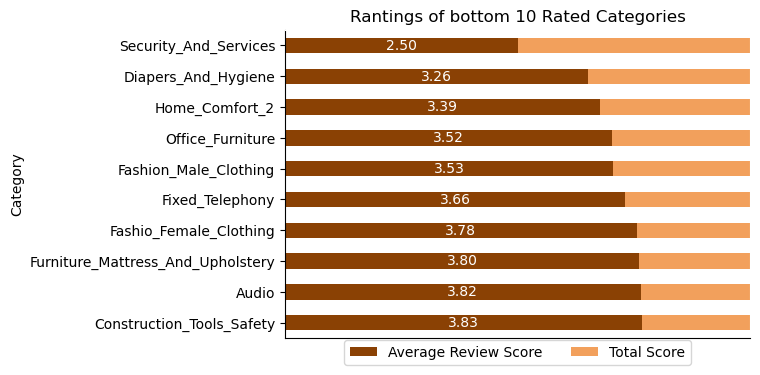

In [279]:
fig, ax = plt.subplots(figsize=(6, 4))

progress_data2.plot(kind='barh', stacked=True, ax=ax, color=['#8a4104', '#f2a05c'])
ax.set_xlim(0, progress_data2['Total Score'].max())

# Remove x-axis labels
ax.set_xticks([])

# Display values on the bars
for bar, value in zip(ax.patches, progress_data2['Average Review Score']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', 
            ha='center', va='center', color='white', fontsize=10)

# Remove or change the color of the right and top spines (border)
ax.spines['right'].set_color('white')  
ax.spines['top'].set_color('white') 

ax.set_title('Rantings of bottom 10 Rated Categories')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.11),ncol=2)

plt.show()

**b. Which products (top10) are maximum rated & minimum rated?**


In [280]:
product_avg_scores=four_df.groupby('product_id')['review_score'].mean().sort_values(ascending=False)
top_10_max_rated_products = product_avg_scores.head(10)
progress_data3 = pd.DataFrame({'Category': top_10_max_rated_products.index, 
                               'Average Review Score': top_10_max_rated_products.values, 
                               'Total Score': [5]*10})
progress_data3.set_index('Category', inplace=True)
progress_data3


,Average Review Score,Total Score
Category,,
00066f42aeeb9f3007548bb9d3f33c38,5.0,5
865bfa00c1dad8f4146d3c2765f051ca,5.0,5
868969d3a93aeeab7bfcd4fc3d3d65de,5.0,5
868766ed2172644fdd977d6bd395a107,5.0,5
8684bd8f93b4f4038d07188a23811e93,5.0,5
867c96d2bb67aba6500a4c509cf76072,5.0,5
867b820367ec206b38a357f2c12454b7,5.0,5
867901d7e8488fb97f1fb538c09d476e,5.0,5
86743ff92eee3d16b7df59cddd583b8c,5.0,5


In [281]:
product_avg_scores=four_df.groupby('product_id')['review_score'].mean().sort_values(ascending=False)
top_10_min_rated_products = product_avg_scores.tail(10)
progress_data4 = pd.DataFrame({'Category': top_10_min_rated_products.index, 
                               'Average Review Score': top_10_min_rated_products.values, 
                               'Total Score': [5]*10})
progress_data4.set_index('Category', inplace=True)
progress_data4

,Average Review Score,Total Score
Category,,
560aa6044750b7511a18e5ee9aaffa17,1.0,5
c3cdb28ed53f4ec5d9afe32753961641,1.0,5
ee8138bcca833152a19543702228ee26,1.0,5
19290ebcf78e385cd9fcd48ce5e1393d,1.0,5
c3c075d20bbf03a458eb5c4458d82380,1.0,5
1938ab47ef011dae9e4ced458166432e,1.0,5
c39610045a59ffcd596a9e9ce4341921,1.0,5
703655144396d09091d9280259c9e51b,1.0,5
703be08855ce485a358cc217d93a05d4,1.0,5


**c. Average rating by location, seller, product, category, month etc.**


In [282]:
#average review scores for each category
four_df.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)


product_category_name
Cds_Dvds_Musicals            4.642857
Fashion_Childrens_Clothes    4.500000
Books_General_Interest       4.430851
Books_Imported               4.419355
Books_Technical              4.345588
                               ...   
Fashion_Male_Clothing        3.531034
Office_Furniture             3.516274
Home_Comfort_2               3.387097
Diapers_And_Hygiene          3.256410
Security_And_Services        2.500000
Name: review_score, Length: 71, dtype: float64

In [283]:
# average review scores for each seller
four_df.groupby('seller_id')['review_score'].mean().sort_values(ascending=False)


seller_id
a9415cf907dfa12f9ed18693244f5329    5.0
2063dd1b9f568df1c16741ea7d3e6adb    5.0
e5def42655b7490edac5a56fe8e9e603    5.0
52b53f7061969fe471d119b6195da864    5.0
2039c5e51785b5dde7cf93ccb3b7be2c    5.0
                                   ... 
f5403d3f50089112c4eed37928b7f622    1.0
749e7cdabbaf72f16677859e27874ba5    1.0
dadc51ef321949ec9a3ab25cd902e23d    1.0
da2782c804606d2a5d8e1760dbb3e7ec    1.0
61b893c57e33626afb104d4112b1be76    1.0
Name: review_score, Length: 3095, dtype: float64

In [284]:
# average review scores for each product
four_df.groupby('product_id')['review_score'].mean().sort_values(ascending=False)

product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
865bfa00c1dad8f4146d3c2765f051ca    5.0
868969d3a93aeeab7bfcd4fc3d3d65de    5.0
868766ed2172644fdd977d6bd395a107    5.0
8684bd8f93b4f4038d07188a23811e93    5.0
                                   ... 
1938ab47ef011dae9e4ced458166432e    1.0
c39610045a59ffcd596a9e9ce4341921    1.0
703655144396d09091d9280259c9e51b    1.0
703be08855ce485a358cc217d93a05d4    1.0
c7796bc610cc40ed7935b75fced0aa0e    1.0
Name: review_score, Length: 32904, dtype: float64

In [285]:
# average review scores for each location
location_avg_scores = four_df.groupby('customer_state')['review_score'].mean().sort_values(ascending=False)

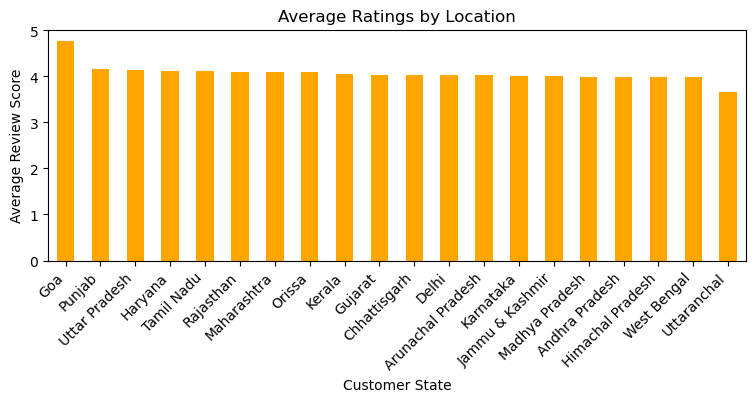

In [286]:
location_avg_scores.plot(kind='bar', color='orange')
plt.title('Average Ratings by Location')
plt.xlabel('Customer State')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Review Score')
plt.gcf().set_size_inches(9,3)
plt.show()

In [287]:
four_df['Date']=four_df.order_purchase_timestamp.dt.strftime("%Y-%m")


In [288]:
# average review scores for each month
month_avg_scores = four_df.groupby('Date')['review_score'].mean().sort_index()


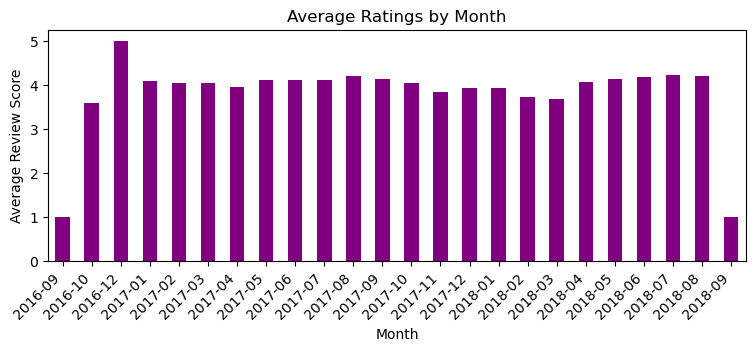

In [289]:
month_avg_scores.plot(kind='bar', color='purple')
plt.title('Average Ratings by Month')
plt.xlabel('Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Review Score')
plt.gcf().set_size_inches(9,3)
plt.show()
